### Student Information
Name:林明杉

Student ID:108012007

GitHub ID:max-lin-texan

Kaggle name: Shohei Оhtani

Kaggle private scoreboard snapshot:

[Snapshot](Ranking.jpeg)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)

[nltk_data] Downloading package punkt to /Users/maxlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


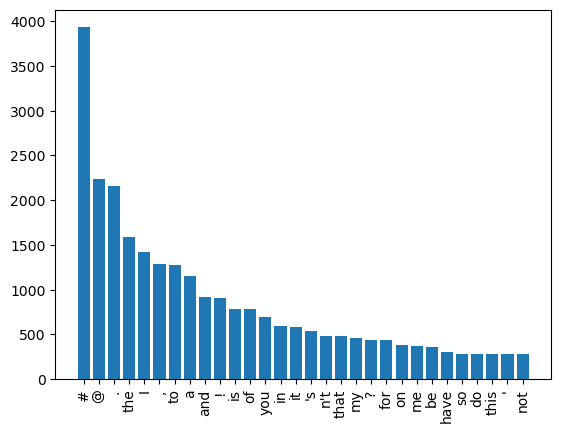

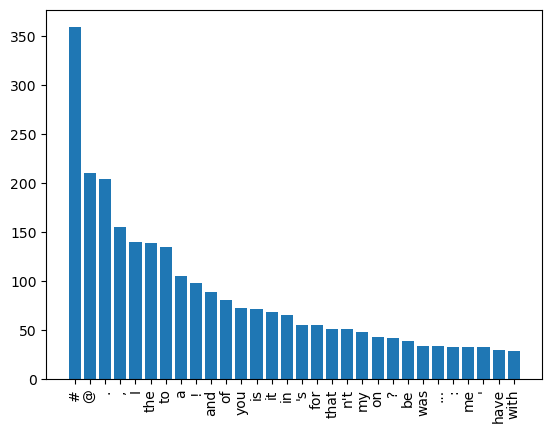

In [2]:
##### 1 #####

import nltk
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import itertools
import matplotlib.pyplot as plt

nltk.download('punkt')
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
train_L = list(train_df[:]['unigrams'])
train_L = list(itertools.chain(*train_L))
train_count = Counter(train_L)
train_count = train_count.most_common(30)
train_x = []
train_y = []
for i in train_count:
    train_x.append(i[0])
    train_y.append(i[1])
plt.bar(train_x,train_y)
plt.xticks(range(len(train_x)), train_x, rotation = "vertical")
plt.show()


test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_L = list(test_df[:]['unigrams'])
test_L = list(itertools.chain(*test_L))
test_count = Counter(test_L)
test_count = test_count.most_common(30)
test_x = []
test_y = []
for i in test_count:
    test_x.append(i[0])
    test_y.append(i[1])
plt.bar(test_x,test_y)
plt.xticks(range(len(test_x)), test_x, rotation = "vertical")
plt.show()

In [3]:
##### 2 #####

from sklearn.feature_extraction.text import TfidfVectorizer

train_data_TFIDF = train_df['text'].astype(str).tolist()
tfidf_vectorizer = TfidfVectorizer(max_features = 1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data_TFIDF)
feature_names = tfidf_vectorizer.get_feature_names_out()

feature_names[100:111]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling', 'book'], dtype=object)

In [4]:
##### 3 #####

#The matrix represents the predicted label and the actual label. It can be interpreted by "we predict the label as anger/fear/joy/sadness, and the actual label is anger/fear/joy/sadness"
#The hight the diagonal values are, the more credible the model is.

Accuracy: 0.6749654218533887
Classification Report:
               precision    recall  f1-score   support

       anger       0.75      0.62      0.68       170
        fear       0.58      0.88      0.70       232
         joy       0.78      0.55      0.64       155
     sadness       0.79      0.55      0.65       166

    accuracy                           0.67       723
   macro avg       0.72      0.65      0.67       723
weighted avg       0.71      0.67      0.67       723



Confuaion Matrix

[[106  49   8   7]
 [  8 205   9  10]
 [ 13  49  85   8]
 [ 15  52   7  92]]


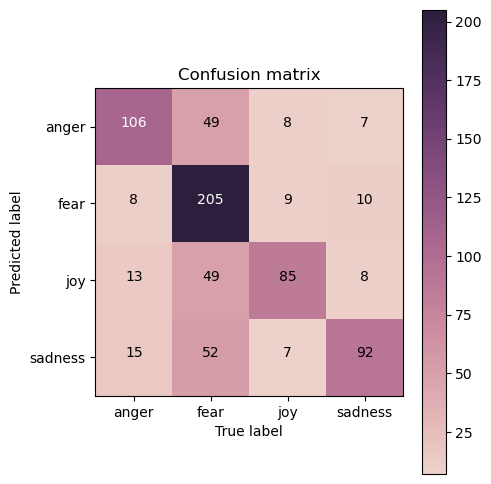

In [5]:
##### 4 #####

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep = "\t", header = None,names = ["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep = "\t", header = None, names = ["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)

#-----------------------------------------------------------------------------------------------------
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap = sns.cubehelix_palette(as_cmap = True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", color = "white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

#-----------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


#train_data_NB = train_df['text'].astype(str).tolist()
#train_data_NB_label = train_df['emotion'].values
train_data_NB = train_df['text']
train_data_NB_label = train_df['emotion']

X_train, X_test, y_train, y_test = train_test_split(train_data_NB, train_data_NB_label, test_size = 0.2, random_state = 42)

tfidf_vectorizer = TfidfVectorizer(max_features = 500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

clf = MultinomialNB(force_alpha = True)
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

print("\n\nConfuaion Matrix\n")
cm = confusion_matrix(y_test,y_pred) 
print(cm)

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes = my_tags, title = 'Confusion matrix')

In [6]:
##### 5 #####

#Using Decision Tree model is a little bit more accurate(f1-score is also a little higher) than using Naive Bayes model.

#Difference 1: The former doesn't focus on the independence of the data, but the latter does.
#Difference 2: The former is more easy to overfit, the latter isn't.

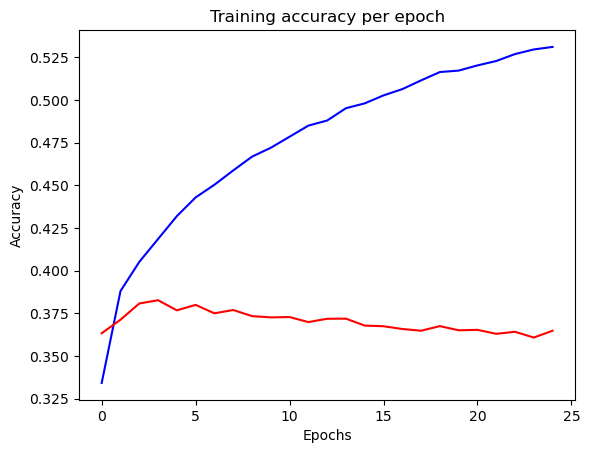

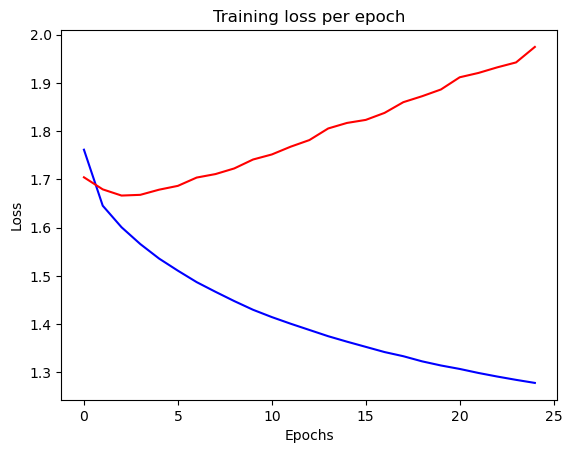

In [7]:
##### 6 #####

import numpy as np
import matplotlib.pyplot as plt

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

x = training_log["epoch"]
y1 = training_log["accuracy"]
y2 = training_log["val_accuracy"]

plt.plot(x,y1,"blue")
plt.plot(x,y2,"red")
plt.title("Training accuracy per epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


y3 = training_log["loss"]
y4 = training_log["val_loss"]

plt.plot(x,y3,"blue")
plt.plot(x,y4,"red")
plt.title("Training loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


#We can explain it by overfitting. If the epochs are too high, the complexity of the model would also be high.
#causing the model fitting the the actual data too closely.

In [8]:
##### 7 #####

import gensim
import warnings
warnings.filterwarnings('ignore')
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values

from gensim.models import Word2Vec

vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

word2vec_model = Word2Vec(sentences = training_corpus, 
                          vector_size = vector_dim, window = window_size, 
                          min_count = min_count, epochs = training_epochs)
#-----------------------------------------------------------------------------------------------------

def get_word_vector(word): #Get all the words in the sentence
    try:
        return word2vec_model.wv[word]
    except KeyError:
        return np.zeros(word2vec_model.vector_size)


def get_sentence_vector(sentence):
    word_vectors = [get_word_vector(word) for word in sentence]
    if np.all(np.array(word_vectors) == 0):
        return np.zeros(word2vec_model.vector_size)
    else:
        return np.mean(word_vectors, axis = 0)

train_df['sentence_vector'] = train_df['text_tokenized'].apply(get_sentence_vector)
train_df




,id,text,emotion,intensity,text_tokenized,sentence_vector
2127,30123,Food that gets delivered 😍🙌🏻,joy,0.729,"[Food, that, gets, delivered, 😍🙌🏻]","[-0.26904058, 0.28627282, 0.16839826, -0.01778..."
960,20103,A country that gave safe house to #Osama Bin #...,fear,0.792,"[A, country, that, gave, safe, house, to, #, O...","[-0.28805706, 0.323611, 0.35783428, 0.3183398,..."
2198,30194,"I like talking to someone who makes me laugh, ...",joy,0.646,"[I, like, talking, to, someone, who, makes, me...","[-0.40072474, 0.4683809, 0.5031241, -0.0499112..."
2511,30507,@tunaeP_ cheer up☺️,joy,0.420,"[@, tunaeP_, cheer, up☺️]","[-0.27148813, -0.077363215, -0.19300708, 0.313..."
1926,21069,"If you think you're good to go already, don't ...",fear,0.208,"[If, you, think, you, 're, good, to, go, alrea...","[-0.302028, 0.57692236, 1.1538844, 0.17881246,..."
...,...,...,...,...,...,...
1873,21016,@residentadvisor thanks for getting back to me...,fear,0.250,"[@, residentadvisor, thanks, for, getting, bac...","[-0.25661805, 0.26464942, 0.26320025, 0.368178..."
2829,40002,Feeling worthless as always,sadness,0.958,"[Feeling, worthless, as, always]","[-0.30258304, 0.30555117, 0.19357759, 0.023636..."
1795,20938,I remember when Rooney wanted to leave United ...,fear,0.312,"[I, remember, when, Rooney, wanted, to, leave,...","[-0.24639378, 0.39166033, 0.48240754, 0.115192..."
1135,20278,@ashish_geol @getPakistanTV @HamidMirGEO .. Ha...,fear,0.646,"[@, ashish_geol, @, getPakistanTV, @, HamidMir...","[-0.30217835, 0.22671503, 0.29447168, 0.419258..."


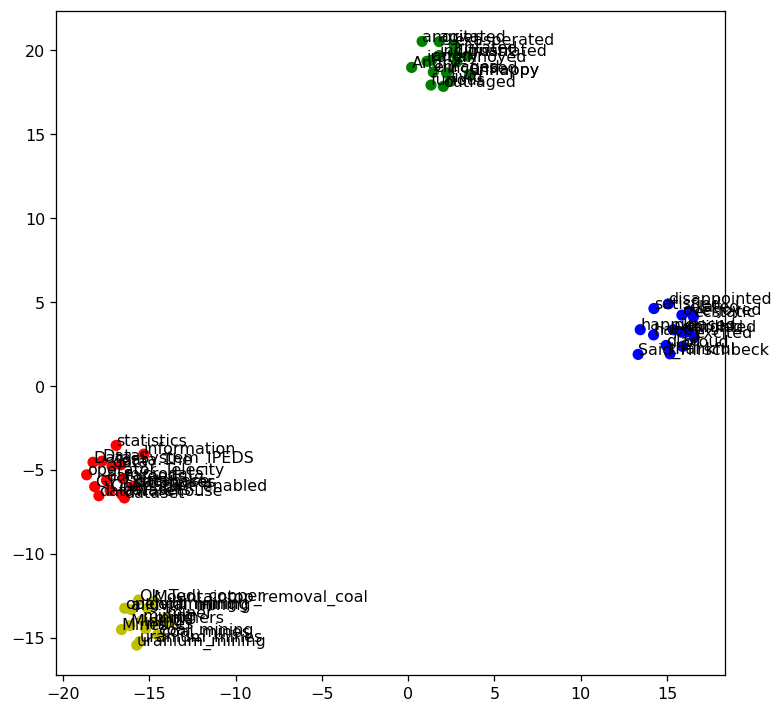

In [9]:
from gensim.models import KeyedVectors

model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary = True)

word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn = topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn = topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn = topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn = topn)]        

target_words = happy_words + angry_words + data_words + mining_words


cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


model = w2v_google_model


size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]


tsne = TSNE(n_components = 2, metric = 'cosine', random_state = 28)


X_tsne = tsne.fit_transform(X_train)


plt.figure(figsize = (7.5, 7.5), dpi = 115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c = color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0,0),  textcoords = 'offset points')
plt.show()

In [12]:
##### Kaggle Competition #####

# import every module needed

import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# read the tweet files

path = open("Kaggle/tweets_DM.json")

data = []

for line in path.readlines():
    item = json.loads(line)
    data.append(item)


In [14]:
# put the data of four tweet atrributes into four lists seperately

data_score = []
data_hashtags = []
data_tid = []
data_text = []

for i in range(0,len(data)):
    data_tid.append(data[i]['_source']['tweet']['tweet_id'])
    data_score.append(data[i]['_score'])
    data_hashtags.append(data[i]['_source']['tweet']['hashtags'])
    data_text.append(data[i]['_source']['tweet']['text'])

In [15]:
# read the data_identification file

DI = pd.read_csv("Kaggle/data_identification.csv")

In [16]:
# convert data_tid and tweet_id to string for matching

data_tid = list(map(str, data_tid))
DI['tweet_id'] = DI['tweet_id'].astype(str)


# create DataFrames from the lists
data_df = pd.DataFrame({'tweet_id': data_tid,
                        'score': data_score,
                        'hashtags': data_hashtags,
                        'text': data_text})


# merge based on 'tweet_id'
DI_new = pd.merge(DI, data_df, on = 'tweet_id', how = 'left')


# only remain the 'tweet_id', 'identification' and 'text' columns
DI_new.drop(columns = ['score','hashtags'], inplace = True)


In [17]:
# seperate the data by 'train' and 'test'

DI_Train = DI_new[DI_new['identification'] == 'train']
DI_Test = DI_new[DI_new['identification'] == 'test']

DI_Train.drop(columns = ['identification'], inplace = True)
DI_Test.drop(columns = ['identification'], inplace = True)


In [18]:
# read the emotion file

EMO = pd.read_csv("Kaggle/emotion.csv")
EMO_tid = list(EMO['tweet_id'])
EMO_emo = list(EMO['emotion'])


In [19]:
# merge the emotion file and training data based on 'tweet_id'

DI_train = pd.merge(DI_Train, EMO, on = 'tweet_id')

In [20]:
# read the sample submission file and leave only 'tweet_id' column

SS = pd.read_csv("Kaggle/sampleSubmission.csv")
SS.columns = ['tweet_id', 'emotion']
SS.drop(columns = ['emotion'], inplace = True)


In [21]:
# merge the sample submission file and testing data based on 'tweet_id'

DI_test = pd.merge(SS, DI_Test, on = 'tweet_id')
SS.columns = ['id']

In [22]:
# check the distribution of the emotions

DI_train.groupby(['emotion']).count()['tweet_id']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: tweet_id, dtype: int64

In [23]:
# reduce the data and make the balanced training data and testing data
anger = DI_train[DI_train['emotion'] == "anger"]
anticipation = DI_train[DI_train['emotion'] == "anticipation"]
disgust = DI_train[DI_train['emotion'] == "disgust"]
fear = DI_train[DI_train['emotion'] == "fear"]
joy = DI_train[DI_train['emotion'] == "joy"]
sadness = DI_train[DI_train['emotion'] == "sadness"]
surprise = DI_train[DI_train['emotion'] == "surprise"]
trust = DI_train[DI_train['emotion'] == "trust"]

# actually I took all the data , since it still can finish the training within several hours
TC = [39867, 248935, 139101, 63999, 516017, 193437, 48729, 205478]
TC2 = [0] * 8
for i in range(0,len(TC)):
    TC2[i] = int(TC[i]/5)

anger_sample = anger.sample(n = TC[0], random_state = 42)
anticipation_sample = anticipation.sample(n = TC[1], random_state = 42)
disgust_sample = disgust.sample(n = TC[2], random_state = 42)
fear_sample = fear.sample(n = TC[3], random_state = 42)
joy_sample = joy.sample(n = TC[4], random_state = 42)
sadness_sample = sadness.sample(n = TC[5], random_state = 42)
surprise_sample = surprise.sample(n = TC[6], random_state = 42)
trust_sample = trust.sample(n = TC[7], random_state = 42)

anger_sample2 = anger.sample(n = TC2[0], random_state = 10)
anticipation_sample2 = anticipation.sample(n = TC2[1], random_state = 10)
disgust_sample2 = disgust.sample(n = TC2[2], random_state = 10)
fear_sample2 = fear.sample(n = TC2[3], random_state = 10)
joy_sample2 = joy.sample(n = TC2[4], random_state = 10)
sadness_sample2 = sadness.sample(n = TC2[5], random_state = 10)
surprise_sample2 = surprise.sample(n = TC2[6], random_state = 10)
trust_sample2 = trust.sample(n = TC2[7], random_state = 10)

# actually equal to DI_train
B_DI_train = pd.concat([anger_sample, anticipation_sample, disgust_sample, fear_sample, joy_sample, sadness_sample, surprise_sample, trust_sample])

# 20% of data from B_DI_train
B_DI_test = pd.concat([anger_sample2, anticipation_sample2, disgust_sample2, fear_sample2, joy_sample2, sadness_sample2, surprise_sample2, trust_sample2])



In [24]:
#convert the emotions into corresponding numbers because it is not allowed to remain as string using XGBoost

B_DI_train['emotion'] = B_DI_train['emotion'].map({'anger':0, 'anticipation':1, 'disgust':2, 'fear':3, 'joy':4, 'sadness':5, 'surprise':6,'trust':7})
B_DI_test['emotion'] = B_DI_test['emotion'].map({'anger':0, 'anticipation':1, 'disgust':2, 'fear':3, 'joy':4, 'sadness':5, 'surprise':6,'trust':7})


B_DI_train

,tweet_id,text,emotion
1294668,0x2898a3,I'm in that wierd moon that's halfway between ...,0
404235,0x340b7d,Overly <LH>,0
1241364,0x1df17f,@Muzzaraw Coolest thing that's happened in the...,0
470944,0x27f975,We just threw it away on 4th down.. & Tony Rom...,0
45918,0x1fce49,@HouseofCommons Stop arguing and get on with i...,0
...,...,...,...
847536,0x36f722,I told my sister to learn the chords of a post...,7
734182,0x312521,@JAMZ963 Put my fav band on the air please! @1...,7
933003,0x2393a1,Redskins with an easy win. <LH>,7
1039057,0x32ee45,Fantastic garden visiting yesterday! Now sat w...,7


In [25]:
##### using BOW + XGBoost #####


# feature engineering: BOW
BOW = CountVectorizer(max_features = 1000) 
BOW.fit(B_DI_train['text'])


# assign training data and testing data
X_train = BOW.transform(B_DI_train['text'])
y_train = B_DI_train['emotion']

X_test = BOW.transform(B_DI_test['text'])
y_test = B_DI_test['emotion']

# model training: XGBoost
xgboostModel = XGBClassifier(n_estimators = 500, learning_rate = 0.3)
xgboostModel.fit(X_train, y_train)

# predict the training data and testing data
predicted_train = xgboostModel.predict(X_train)
predict_test = xgboostModel.predict(X_test)


# accuracy score for training data and testing data
print('Train accuracy: %.2f' % xgboostModel.score(X_train,y_train))
print('Test accuracy: %.2f' % xgboostModel.score(X_test,y_test))

# classification report for testing data
print(classification_report(y_true = y_test, y_pred = predict_test))

Train accuracy: 0.54
Test accuracy: 0.54
              precision    recall  f1-score   support

           0       0.69      0.15      0.25      7973
           1       0.68      0.49      0.57     49787
           2       0.52      0.29      0.37     27820
           3       0.77      0.27      0.40     12799
           4       0.49      0.89      0.63    103203
           5       0.56      0.41      0.47     38687
           6       0.77      0.17      0.27      9745
           7       0.70      0.26      0.38     41095

    accuracy                           0.54    291109
   macro avg       0.65      0.37      0.42    291109
weighted avg       0.59      0.54      0.51    291109



In [26]:
# predict the target data

D = BOW.transform(DI_test['text'])
result = xgboostModel.predict(D)
result[:50]

array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 1,
       1, 4, 1, 5, 4, 4, 4, 2, 4, 4, 7, 5, 4, 4, 4, 2, 4, 2, 4, 3, 7, 4,
       2, 4, 4, 7, 1, 4])

In [27]:
# put the predicted result into sample submission file


SS['emotion'] = result

# convert the eight kinds of emotions from numbers back to string
SS['emotion'] = SS['emotion'].map({0:'anger', 1:'anticipation', 2:'disgust', 3:'fear', 4:'joy', 5:'sadness', 6:'surprise',7:'trust'})
SS

,id,emotion
0,0x2c7743,joy
1,0x2c1eed,joy
2,0x2826ea,joy
3,0x356d9a,joy
4,0x20fd95,joy
...,...,...
411967,0x351857,joy
411968,0x2c028e,anger
411969,0x1f2430,anticipation
411970,0x2be24e,joy


In [28]:
# save the csv file for submitting
# highest score so far: 0.427

SS.to_csv("Kaggle_Submit_BOW_XGBoost.csv", index = False)